In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/donald-trumps-rallies/NewHampshireAug15_2019.txt
/kaggle/input/donald-trumps-rallies/BemidjiSep18_2020.txt
/kaggle/input/donald-trumps-rallies/CharlotteMar2_2020.txt
/kaggle/input/donald-trumps-rallies/ToledoJan9_2020.txt
/kaggle/input/donald-trumps-rallies/GreenvilleJul17_2019.txt
/kaggle/input/donald-trumps-rallies/YumaAug18_2020.txt
/kaggle/input/donald-trumps-rallies/LatrobeSep3_2020.txt
/kaggle/input/donald-trumps-rallies/TexasSep23_2019.txt
/kaggle/input/donald-trumps-rallies/HendersonSep13_2020.txt
/kaggle/input/donald-trumps-rallies/PhoenixFeb19_2020.txt
/kaggle/input/donald-trumps-rallies/MosineeSep17_2020.txt
/kaggle/input/donald-trumps-rallies/BattleCreekDec19_2019.txt
/kaggle/input/donald-trumps-rallies/TulsaJun20_2020.txt
/kaggle/input/donald-trumps-rallies/NewHampshireFeb10_2020.txt
/kaggle/input/donald-trumps-rallies/FreelandSep10_2020.txt
/kaggle/input/donald-trumps-rallies/HersheyDec10_2019.txt
/kaggle/input/donald-trumps-rallies/NewHampshireAug28_2020.tx

In [2]:
import os
import re
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
input_dir = "/kaggle/input/donald-trumps-rallies"
all_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir)]

all_text = ""
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        all_text += file.read() + "\n"


In [4]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

cleaned_text = preprocess_text(all_text)

In [5]:
word_list = cleaned_text.split()
word_counts = Counter(word_list)

# Display the top 10 most common words
print("Top 100 Most Common Words:")
print(word_counts.most_common(100))

Top 100 Most Common Words:
[('the', 14149), ('and', 11283), ('to', 9346), ('a', 7896), ('you', 7699), ('i', 7625), ('of', 6829), ('we', 6529), ('it', 5591), ('they', 5522), ('that', 5291), ('in', 4658), ('have', 3866), ('but', 2995), ('is', 2864), ('were', 2578), ('he', 2551), ('for', 2542), ('was', 2501), ('its', 2484), ('going', 2319), ('this', 2267), ('are', 2251), ('our', 2222), ('said', 2222), ('so', 2199), ('people', 2148), ('know', 2041), ('great', 2009), ('dont', 1920), ('do', 1904), ('what', 1893), ('all', 1835), ('with', 1826), ('be', 1793), ('right', 1665), ('on', 1591), ('not', 1527), ('your', 1526), ('like', 1508), ('thats', 1491), ('want', 1490), ('theyre', 1439), ('because', 1403), ('one', 1396), ('them', 1395), ('will', 1374), ('very', 1347), ('up', 1327), ('now', 1279), ('no', 1254), ('got', 1231), ('about', 1206), ('get', 1185), ('say', 1153), ('if', 1133), ('years', 1112), ('hes', 1106), ('out', 1105), ('had', 1098), ('by', 1081), ('think', 1058), ('never', 1043), ('

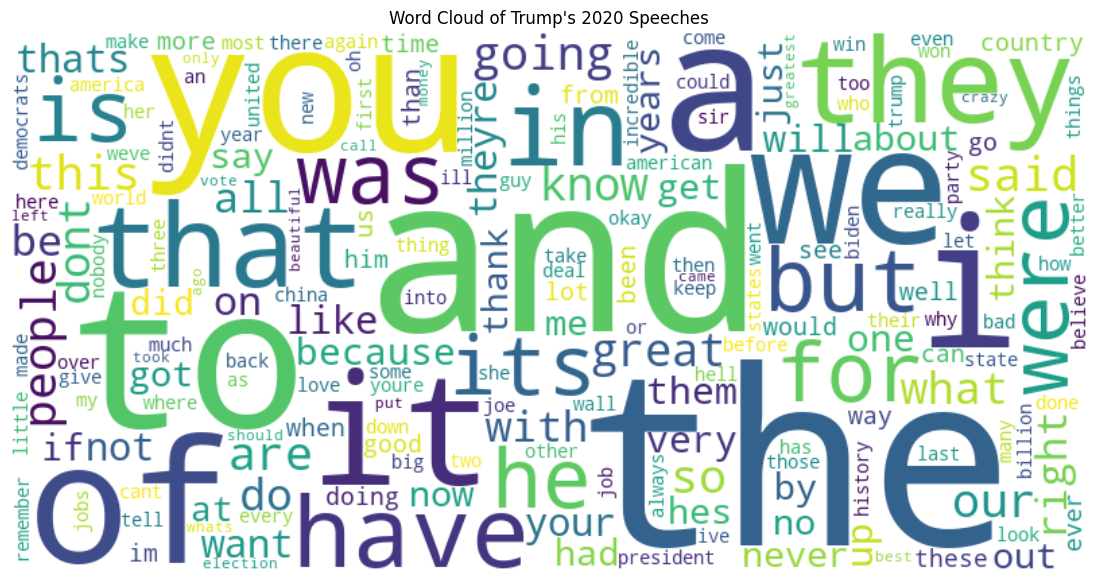

In [6]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Trump's 2020 Speeches")
plt.show()

In [7]:
blob = TextBlob(all_text)
overall_sentiment = blob.sentiment.polarity  # Polarity: -1 (negative) to 1 (positive)
print(f"Overall Sentiment Polarity: {overall_sentiment:.2f}")

Overall Sentiment Polarity: 0.17


In [8]:
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        speech_blob = TextBlob(text)
        print(f"Sentiment Polarity for {os.path.basename(file_path)}: {speech_blob.sentiment.polarity:.2f}")

Sentiment Polarity for NewHampshireAug15_2019.txt: 0.22
Sentiment Polarity for BemidjiSep18_2020.txt: 0.17
Sentiment Polarity for CharlotteMar2_2020.txt: 0.19
Sentiment Polarity for ToledoJan9_2020.txt: 0.18
Sentiment Polarity for GreenvilleJul17_2019.txt: 0.20
Sentiment Polarity for YumaAug18_2020.txt: 0.15
Sentiment Polarity for LatrobeSep3_2020.txt: 0.15
Sentiment Polarity for TexasSep23_2019.txt: 0.26
Sentiment Polarity for HendersonSep13_2020.txt: 0.16
Sentiment Polarity for PhoenixFeb19_2020.txt: 0.18
Sentiment Polarity for MosineeSep17_2020.txt: 0.14
Sentiment Polarity for BattleCreekDec19_2019.txt: 0.16
Sentiment Polarity for TulsaJun20_2020.txt: 0.15
Sentiment Polarity for NewHampshireFeb10_2020.txt: 0.16
Sentiment Polarity for FreelandSep10_2020.txt: 0.17
Sentiment Polarity for HersheyDec10_2019.txt: 0.13
Sentiment Polarity for NewHampshireAug28_2020.txt: 0.14
Sentiment Polarity for DallasOct17_2019.txt: 0.15
Sentiment Polarity for CincinnatiAug1_2019.txt: 0.19
Sentiment Pola

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
nlp.max_length = len(cleaned_text) + 100000
doc = nlp(cleaned_text)
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
print("Sample Lemmatized Tokens:", lemmatized_tokens[:10])

Sample Lemmatized Tokens: [' ', 'thank', 'everybody', 'thank', 'wow', 'let', 'tell', 'amazing', 'want', 'thank']


In [11]:
word_counts = Counter(lemmatized_tokens)

print("Top 10 Most Common Lemmatized Words:")
print(word_counts.most_common(10))

Top 10 Most Common Lemmatized Words:
[('not', 4024), (' ', 3564), ('s', 3556), ('go', 2873), ('say', 2545), ('great', 2350), ('know', 2237), ('people', 2152), ('want', 1786), ('right', 1675)]


In [12]:
print("\nTop 100 Named Entities Found:")
for ent in doc.ents[:100]: 
    print(f"{ent.text} ({ent.label_})")


Top 100 Named Entities Found:
new hampshire (GPE)
third (ORDINAL)
fourth (ORDINAL)
number one (CARDINAL)
thousands (CARDINAL)
america (GPE)
today (DATE)
new hampshire (GPE)
three (CARDINAL)
democrats (NORP)
new hampshire (GPE)
one (CARDINAL)
four (CARDINAL)
four (CARDINAL)
four years (DATE)
four years (DATE)
three years ago (DATE)
america (GPE)
america (GPE)
millions and millions of dollars (MONEY)
millions (CARDINAL)
first (ORDINAL)
first (ORDINAL)
a million dollars (MONEY)
china (GPE)
china (GPE)
millions (CARDINAL)
china (GPE)
joe biden (PERSON)
kamala kamala (PERSON)
joe (PERSON)
today (DATE)
today (DATE)
the new york times (ORG)
new york (GPE)
michigan (GPE)
michigan (GPE)
wisconsin (GPE)
pennsylvania (GPE)
louisiana (GPE)
pennsylvania (GPE)
socialists (NORP)
communists (NORP)
about a month (DATE)
elizabeth warren (PERSON)
new hampshire (GPE)
first (ORDINAL)
a minute (TIME)
a couple of days ago (DATE)
china (GPE)
yesterday (DATE)
billions of dollars (MONEY)
billions of dollars (M

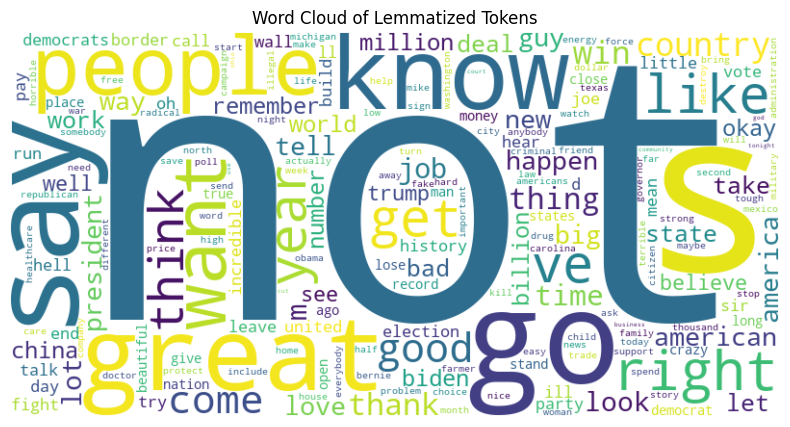

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Lemmatized Tokens")
plt.show()


In [14]:
from spacy import displacy
limited_text = " ".join([token.text for token in doc[:1000]])

# Create a SpaCy doc for the limited text
doc_limited = nlp(limited_text)

# Visualize the limited entities
print("\nVisualizing First 1000 Entities:")
displacy.render(doc_limited, style="ent", jupyter=True)



Visualizing First 1000 Entities:
